# CNN for malware classification using balanced and imbalanced data

In [1]:
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

num_classes = 25

### Load data

In [2]:
# Load train data
train_path = "./new_aug_70_3000/train/"
batches_train = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(64,64), batch_size=75000)
X_train, y_train = next(batches_train)
X_train = X_train/255.

# Load test data
test_path = "./new_aug_70_3000/val/"
batches_test = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(64,64), batch_size=2000)
X_test, y_test = next(batches_test)
X_test = X_test/255.

Found 75000 images belonging to 25 classes.
Found 1750 images belonging to 25 classes.


### Create CNN model

In [3]:
def create_model():
    # CNN Model architecture
    # ___________________________________________________________

    input = tf.keras.Input(shape=(64,64,3))

    # Block 1
    x = tf.keras.layers.Conv2D(128, kernel_size=(3 ,3), activation='relu', strides=(2, 2), padding="same")(input)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)

    # Block 2
    x = tf.keras.layers.Conv2D(64, kernel_size=(4 ,4), activation='relu', padding="valid")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)

    x = tf.keras.layers.Dropout(.3)(x)
    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(50, activation='relu')(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # bind all
    model = tf.keras.Model(input, output)
    
    model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),
             tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(),
             tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()
    ])
    
    return model

In [4]:
model = create_model()

### Visualise the model

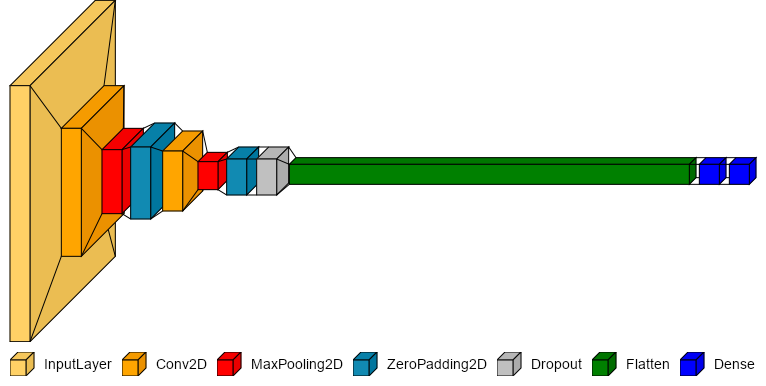

In [5]:
from PIL import ImageFont
from collections import defaultdict

font = ImageFont.truetype("arial.ttf", 14) 

color_map = defaultdict(dict)
color_map[tf.keras.layers.Conv2D]['fill'] = 'orange'
color_map[tf.keras.layers.Dropout]['fill'] = 'silver'
color_map[tf.keras.layers.MaxPooling2D]['fill'] = 'red'
color_map[tf.keras.layers.Dense]['fill'] = 'blue'
color_map[tf.keras.layers.Flatten]['fill'] = 'green'


import visualkeras
visualkeras.layered_view(model, legend=True,font=font,color_map=color_map)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

### Fit and evaluate the model

In [8]:
batch_size = 256
epochs = 50

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25 )

test_scores = model.evaluate(X_test, y_test, verbose=2)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

### Ploting results

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [ ]:
test_scores